# **Expected increase in Nitrous oxide emission**

Nitrous oxide (N2O) is a potent greehouse gas. It is considered a third most important greenhous gas after methane and carbon dioxide. It is considered as one of the biggest human related threat to the ozone layer. Agricultural fertilizer applications and dairy farming are the major source of N2O emission. Nearly a 30% increase in the emission of N2O was noted in the past four decades. Nitrous oxide posses 300 times higher atmosphere warming potential than CO2.

Based on the avaialable data we can predict the increase or decrease in the emission of N2O. There is an ample amount of data stored in the [FAO Database](https://www.fao.org/faostat/en/#data)

We are going to perform the prediction using ***Machine Learning*** algorithms. For that purpose we need important libraries to import, clean and analysis of data.\
Below we imported ***NumPy*** and ***Pandas*** libraries.

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd

The nitrous oxide emission data from FAO database was imported. The data include global N2O emission values from 1961-2019 from agricultural soils./
The data is imported from the CSV file using the codes below.

In [2]:
df=pd.read_csv("emm_n2o.csv")
df.head()


,Domain,Area,Element,Item,Year,Source,Unit,Value
0,Emissions Totals,World,Direct emissions (N2O),Agricultural Soils,1961,FAO TIER 1,kilotonnes,1841.0876
1,Emissions Totals,World,Direct emissions (N2O),Agricultural Soils,1962,FAO TIER 1,kilotonnes,1896.9660
2,Emissions Totals,World,Direct emissions (N2O),Agricultural Soils,1963,FAO TIER 1,kilotonnes,1942.8741
3,Emissions Totals,World,Direct emissions (N2O),Agricultural Soils,1964,FAO TIER 1,kilotonnes,2004.8762
4,Emissions Totals,World,Direct emissions (N2O),Agricultural Soils,1965,FAO TIER 1,kilotonnes,2077.2466


To see the column names only I used the function given below. It makes it easy to select the coulmn names espacially when there are more number of columns.

In [3]:
df.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Source', 'Unit', 'Value'], dtype='object')

The required variables are stored into the new variables X and y. The X variable contains the indepenedant/feature variable, while the y variable contains the data of dependant/target variable.

In [4]:
X=df[["Year"]]
y=df["Value"]

The model from the Scikit-learn library is fitted on the variables

In [5]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression().fit(X,y)

To evaluate the model efficiency/accuracy/fitness, the data is divided into training and testing data. The training data will be used to train the model and the prediction will be carried out on test data.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

The model is trained using training data using the code given below

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train, y_train)

Prediction is carried out on test data to see the efficiency of the model and the R2 metrics is used to evaluate the model fitness.

In [8]:
y_pred=model.predict(X_test)
y_pred

array([3377.47860383, 3844.15128191, 4258.9714402 , 3481.18364341,
       2599.69080705, 2133.01812897, 3792.29876212, 4414.52899955,
       4103.41388084, 3170.06852469, 2236.72316854, 2547.83828726])

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.972352774127542

As we can see the accuracy of the model is 97% which is quite good. SO now it is confirmed that the model is good to predict the future variation in the data.\
We prepared an array of input variables that we want to predict.

In [10]:
x=[[2020], [2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028], [2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],
[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]]

The array of generated input variables is feed to the model prediction function below and we can see the expected values as a output.

In [11]:
exp1=model1.predict(x)
exp1

array([5096.2290232 , 5148.38665098, 5200.54427876, 5252.70190654,
       5304.85953432, 5357.0171621 , 5409.17478988, 5461.33241766,
       5513.49004544, 5565.64767321, 5617.80530099, 5669.96292877,
       5722.12055655, 5774.27818433, 5826.43581211, 5878.59343989,
       5930.75106767, 5982.90869545, 6035.06632323, 6087.22395101,
       6139.38157878, 6191.53920656, 6243.69683434, 6295.85446212,
       6348.0120899 , 6400.16971768, 6452.32734546, 6504.48497324,
       6556.64260102, 6608.8002288 , 6660.95785658])

The predicted values are in the form of array, so to convert an array to a dataFrame, we used the function given below. The converted data frame is then exported to a CSV file for furthur use.

In [12]:
df2=pd.DataFrame(exp1, columns=["Value"])

In [ ]:
df2.to_csv("C:/Users/BQD45O/Desktop/Git/meta/exp.csv")

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df2=pd.read_csv("emm_n2o_expec.csv")

Text(0.5, 1.0, 'Nitrous Oxide Emission from  Agricultural soils (1961-2050)')

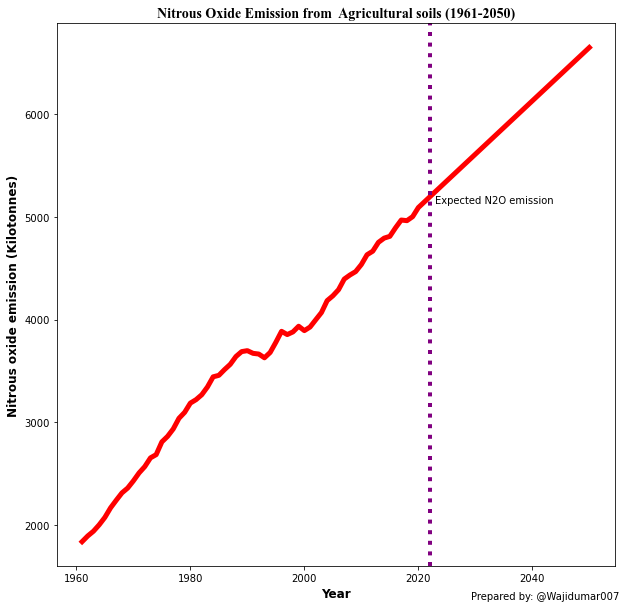

In [15]:
plt.figure(figsize=(10,10))
Year=df2["Year"]
Value=df2["Value"]
sns.lineplot(x=Year, y=Value, data=df2, color="red", linewidth=5)
plt.axvline(x=2022, ymin=0, ymax=1, color="purple", linestyle="dotted", linewidth=4)
plt.figtext(0.7,0.08, "Prepared by: @Wajidumar007")
plt.figtext(0.65,0.63, "Expected N2O emission")
plt.xlabel("Year", size=12, weight="bold")
plt.ylabel("Nitrous oxide emission (Kilotonnes)", size=12, weight="bold")
plt.title("Nitrous Oxide Emission from  Agricultural soils (1961-2050)", size=14, weight="bold", family="Times New Roman")